https://jerryfriedman.su.domains/ftp/trebst.pdf


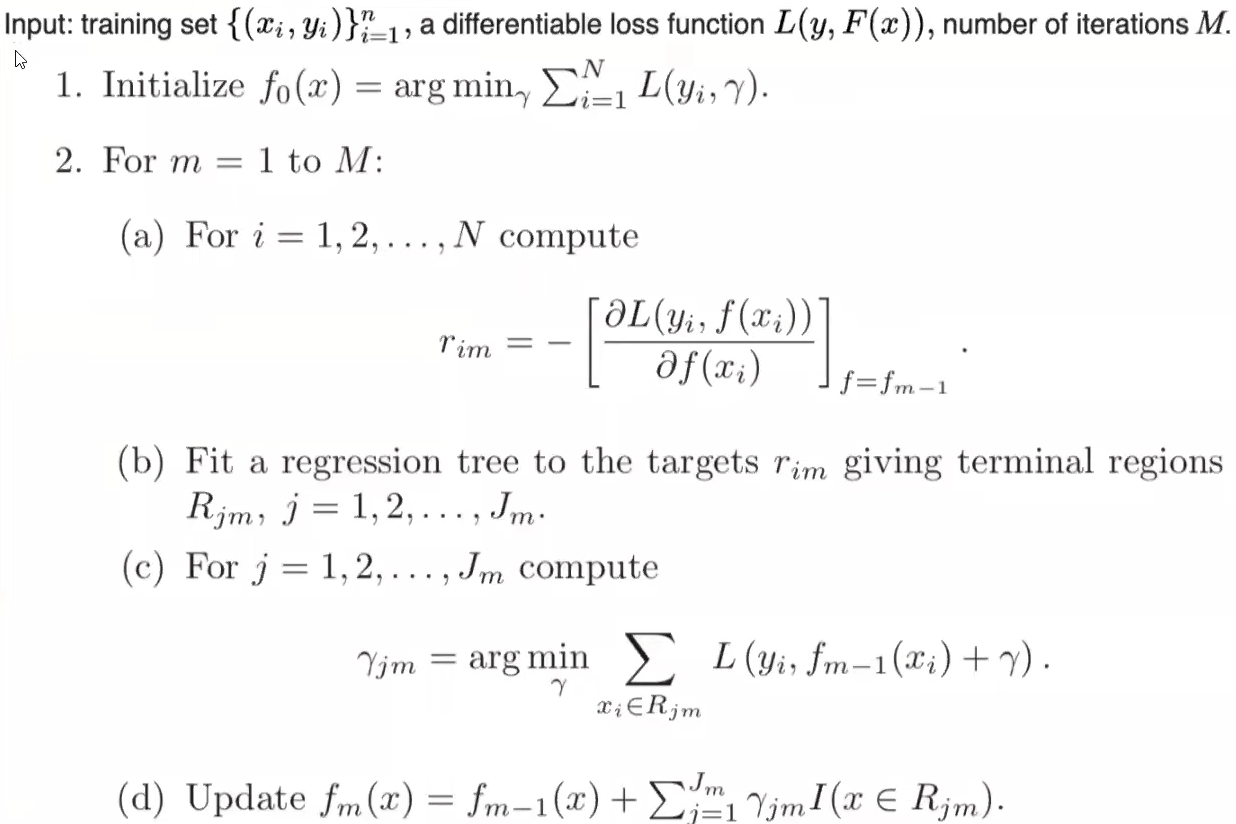

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('./data/1000_Companies.csv').drop('State',axis=1)
print(df.shape)
df.head()

(1000, 4)


,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:

df = df.iloc[[0,11,36]]
df = round(df/1000)
df

,R&D Spend,Administration,Marketing Spend,Profit
0,165.0,137.0,472.0,192.0
11,101.0,92.0,250.0,144.0
36,29.0,127.0,201.0,91.0


In [5]:
df['f0(x)'] = df['Profit'].mean()
df

,R&D Spend,Administration,Marketing Spend,Profit,f0(x)
0,165.0,137.0,472.0,192.0,142.333333
11,101.0,92.0,250.0,144.0,142.333333
36,29.0,127.0,201.0,91.0,142.333333


In [6]:
df['ri1'] = df['Profit'] - df['f0(x)']
df

,R&D Spend,Administration,Marketing Spend,Profit,f0(x),ri1
0,165.0,137.0,472.0,192.0,142.333333,49.666667
11,101.0,92.0,250.0,144.0,142.333333,1.666667
36,29.0,127.0,201.0,91.0,142.333333,-51.333333


[Text(0.5, 0.75, 'x[0] <= 65.0\nsquared_error = 1701.556\nsamples = 3\nvalue = -0.0'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = -51.333'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 576.0\nsamples = 2\nvalue = 25.667'),
 Text(0.625, 0.5, '  False')]

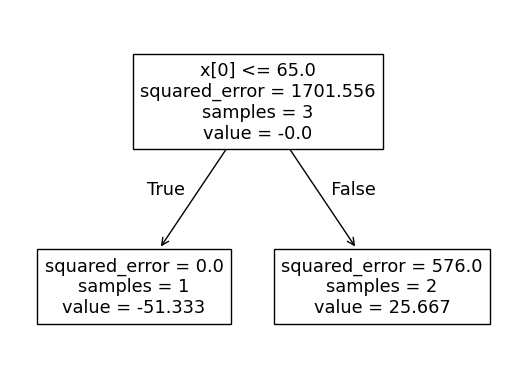

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
dt1 = DecisionTreeRegressor(max_depth = 1)
dt1.fit(df.iloc[:,0:3].values,df['ri1'].values)
plot_tree(dt1)


for mse -> Y(jm) = output of decision tree
=> f1(x) = f(0) + sum(Y(j0))

In [8]:
df['y(j0)'] = dt1.predict(df.iloc[:,0:3].values)
df

,R&D Spend,Administration,Marketing Spend,Profit,f0(x),ri1,y(j0)
0,165.0,137.0,472.0,192.0,142.333333,49.666667,25.666667
11,101.0,92.0,250.0,144.0,142.333333,1.666667,25.666667
36,29.0,127.0,201.0,91.0,142.333333,-51.333333,-51.333333


In [9]:
df['f1(x)'] = df['f0(x)']+df['y(j0)']
df

,R&D Spend,Administration,Marketing Spend,Profit,f0(x),ri1,y(j0),f1(x)
0,165.0,137.0,472.0,192.0,142.333333,49.666667,25.666667,168.0
11,101.0,92.0,250.0,144.0,142.333333,1.666667,25.666667,168.0
36,29.0,127.0,201.0,91.0,142.333333,-51.333333,-51.333333,91.0


repeat above steps for M-1 more iterations

In [14]:
M = 10
dt_list = []
for i in range(2,M+1):
  df[f'ri{i}'] = df['Profit'] - df[f'f{i-1}(x)']
  dt = DecisionTreeRegressor(max_depth = 1)
  dt.fit(df.iloc[:,0:3].values,df[f'ri{i}'].values)
  df[f'y(j{i-1})'] = dt.predict(df.iloc[:,0:3].values)
  df[f'f{i}(x)'] = df[f'f{i-1}(x)']+df[f'y(j{i-1})']
print("Actual vs Predictions:")
for actual, predicted in zip(df['Profit'], df[f'f{M}(x)']):
    print(f"Actual: {actual}, Predicted: {predicted}")
  

Actual vs Predictions:
Actual: 192.0, Predicted: 192.046875
Actual: 144.0, Predicted: 143.953125
Actual: 91.0, Predicted: 91.0


In [12]:
df

,R&D Spend,Administration,Marketing Spend,Profit,f0(x),ri1,y(j0),f1(x),ri2,y(j1),...,f7(x),ri8,y(j7),f8(x),ri9,y(j8),f9(x),ri10,y(j9),f10(x)
0,165.0,137.0,472.0,192.0,142.333333,49.666667,25.666667,168.0,24.0,24.0,...,192.375,-0.375,-0.1875,192.1875,-0.1875,-0.18750,192.00000,0.00000,0.046875,192.046875
11,101.0,92.0,250.0,144.0,142.333333,1.666667,25.666667,168.0,-24.0,-12.0,...,144.000,0.000,-0.1875,143.8125,0.1875,0.09375,143.90625,0.09375,0.046875,143.953125
36,29.0,127.0,201.0,91.0,142.333333,-51.333333,-51.333333,91.0,0.0,-12.0,...,90.625,0.375,0.3750,91.0000,0.0000,0.09375,91.09375,-0.09375,-0.093750,91.000000


In [15]:
df.to_csv('Boosting_path.csv')

Testing on whole Dataset:

In [16]:
df = pd.read_csv('./data/1000_Companies.csv').drop('State',axis=1)
df = round(df/1000)
print(df.shape)
df.head()

(1000, 4)


,R&D Spend,Administration,Marketing Spend,Profit
0,165.0,137.0,472.0,192.0
1,163.0,151.0,444.0,192.0
2,153.0,101.0,408.0,191.0
3,144.0,119.0,383.0,183.0
4,142.0,91.0,366.0,166.0


In [17]:
from sklearn.metrics import r2_score


In [18]:
M = 100
X = df.iloc[:, 0:3].values
y = df['Profit'].values
pred = np.full_like(y, fill_value=np.mean(y), dtype=float)  # f₀(x) = mean(y)

for i in range(1, M + 1):
    residual = y - pred
    dt = DecisionTreeRegressor(max_depth=1)
    dt.fit(X, residual)
    update = dt.predict(X)
    pred += update  # fᵢ(x) = fᵢ₋₁(x) + y(j)
df[f'f{M}(x)'] = pred
r2 = r2_score(y, pred)
print(f"\nR² Score: {r2:.4f}")



R² Score: 0.9963


--above model stored in .py

In [20]:
df.sample(20)

,R&D Spend,Administration,Marketing Spend,Profit,f100(x)
492,27.0,115.0,122.0,72.0,71.295589
978,59.0,119.0,182.0,99.0,100.179080
127,105.0,126.0,272.0,139.0,140.230491
351,108.0,126.0,277.0,141.0,140.230491
565,95.0,124.0,252.0,130.0,129.587383
431,57.0,119.0,178.0,97.0,100.179080
761,83.0,123.0,229.0,120.0,115.693641
721,46.0,117.0,158.0,88.0,87.094839
847,46.0,117.0,157.0,88.0,87.094839
738,87.0,123.0,237.0,124.0,128.976336
